## **23.02.05 check the group**

In [1]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
import pandas as pd

from TO_sim.To_Draw import Draw_theoretical_wData as DD
from TO_sim.To_Draw import Draw_theoretical as DDD
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_init_pvel as Hp
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from TO_sim.Utility import *
import parmap

In [2]:
DF = 'Review/23.02.05 check the group/'
Create_Folder(DF)
N = 500
dist = 'Normal'
t_end = 500
ss = 10
N = 500
dK = 0.2
dt = 0.1
m = 0
applys = [1]
save = True
ms = [6]
core = [len(ms) if len(ms)<10 else 10][0]
print(core)
# Draw_ = DD(m=m,dist = 'Normal')
df_sets = {}
rdf_sets = {}

for m,(df,rdf) in zip(ms,parmap.map(Hp,ms\
                ,N=N,t_end=t_end,dist = dist,dt = 0.1,dK=dK, shuffle = True, shuffle_seed = ss+1,Init_dtheta=False,Init_dtheta_seed=applys, seed=10\
                ,second_initial_state = False,Init_dtheta_omega = False,pm_processes=core,pm_pbar=True)):
    df_sets[m] = df
    rdf_sets[m] = rdf

1


  0%|          | 0/1 [00:00<?, ?it/s]

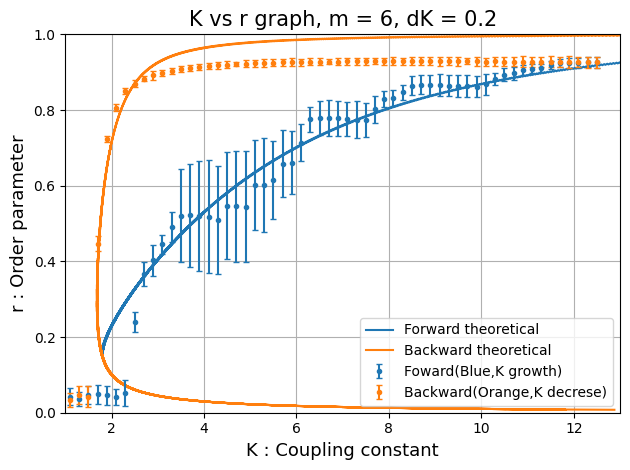

In [3]:
ST = 50
Ks = df.index
Ksr = rdf.index
Create_Folder(DF+f'{dist} not r=0/')
for m in ms:
    df = df_sets[m]
    rdf = rdf_sets[m]
    plt.figure(facecolor='white')
    data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    Draw_ = DD(m=m,dist='Normal')
    # Draw_ = DDD(m=m)
    Draw_.total()

    plt.errorbar(Ks,data_rs,data_std,fmt='.',color='tab:blue',capsize=2,label='Foward(Blue,K growth)')
    plt.errorbar(Ksr,data_rrs,data_rstd,fmt='.',color='tab:Orange',capsize=2,label='Backward(Orange,K decrese)')

    # plt.plot(Ks,data_rs,'.',label=r"$Forward$",markersize=6,color = 'Tab:Blue',)
    # plt.plot(Ksr,data_rrs,'.',label=r"$Backward$",markersize=6,color = 'Tab:Orange',)
    plt.legend()  
    plt.title(f'K vs r graph, m = {m}, dK = {dK}',fontsize= 15)
    plt.grid()

    plt.xlim(1,13)
    plt.ylim(0,1)

    plt.xlabel('K : Coupling constant',fontsize=13)
    plt.ylabel('r : Order parameter',fontsize=13)
    plt.tight_layout()
    plt.savefig(DF+f'{dist} not r=0/m = {m}, dK = {dK}, K vs r graph.png',dpi=400)

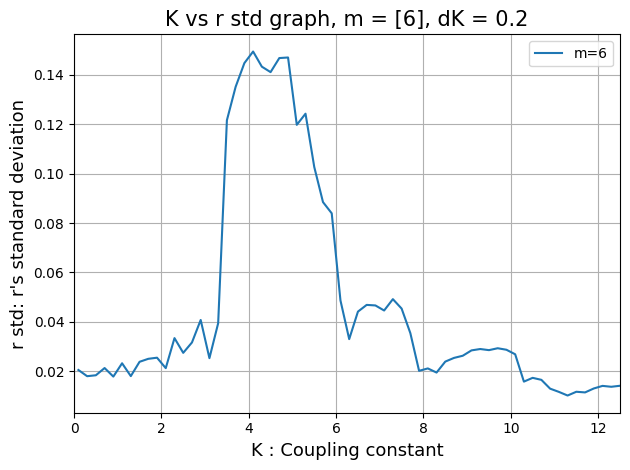

In [4]:
ST = 50
Ks = df.index
Ksr = rdf.index
Create_Folder(DF+f'{dist} not r=0/')
for m in ms:
    df = df_sets[m]
    rdf = rdf_sets[m]
    # plt.figure(facecolor='white')
    data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    plt.plot(Ks,data_std,label = f'm={m}')
    # plt.plot(Ks,data_rstd)

    # plt.errorbar(Ks,data_rs,data_std,fmt='.',color='tab:blue',capsize=2,label='Case 1(Blue,FW)')
    # plt.errorbar(Ksr,data_rrs,data_rstd,fmt='.',color='tab:Orange',capsize=2,label='Case 1(Orange,BW)')

    # plt.plot(Ks,data_rs,'.',label=r"$Forward$",markersize=6,color = 'Tab:Blue',)
    # plt.plot(Ksr,data_rrs,'.',label=r"$Backward$",markersize=6,color = 'Tab:Orange',)
plt.legend()  
plt.title(f'K vs r std graph, m = {ms}, dK = {dK}',fontsize= 15)
plt.grid()

plt.xlim(0,12.5)
# plt.ylim(0,1)

plt.xlabel('K : Coupling constant',fontsize=13)
plt.ylabel('r std: r\'s standard deviation',fontsize=13)
plt.tight_layout()
# plt.savefig(DF+f'{dist} not r=0/'+f'm={ms} K vs r std.png')

## animation

In [18]:
def mean_wtime(x):
    temp = x[-200:,:]
    result = np.mean(temp,axis=0)
    return result

In [11]:
import math

In [15]:
df.iloc[0].theta_s.shape

(5001, 500)

In [36]:
idx = 20
theta_ = df.iloc[idx].theta_s[-100:,:]
Aij = np.zeros((500,500))
Pij = np.zeros_like(1j*Aij)
for t_ in theta_:
    i,j = np.meshgrid(t_,t_)
    Pij += np.exp(1j*(i-j))
aPij = np.abs(Pij)/100


In [37]:
np.max(aPij)

1.0

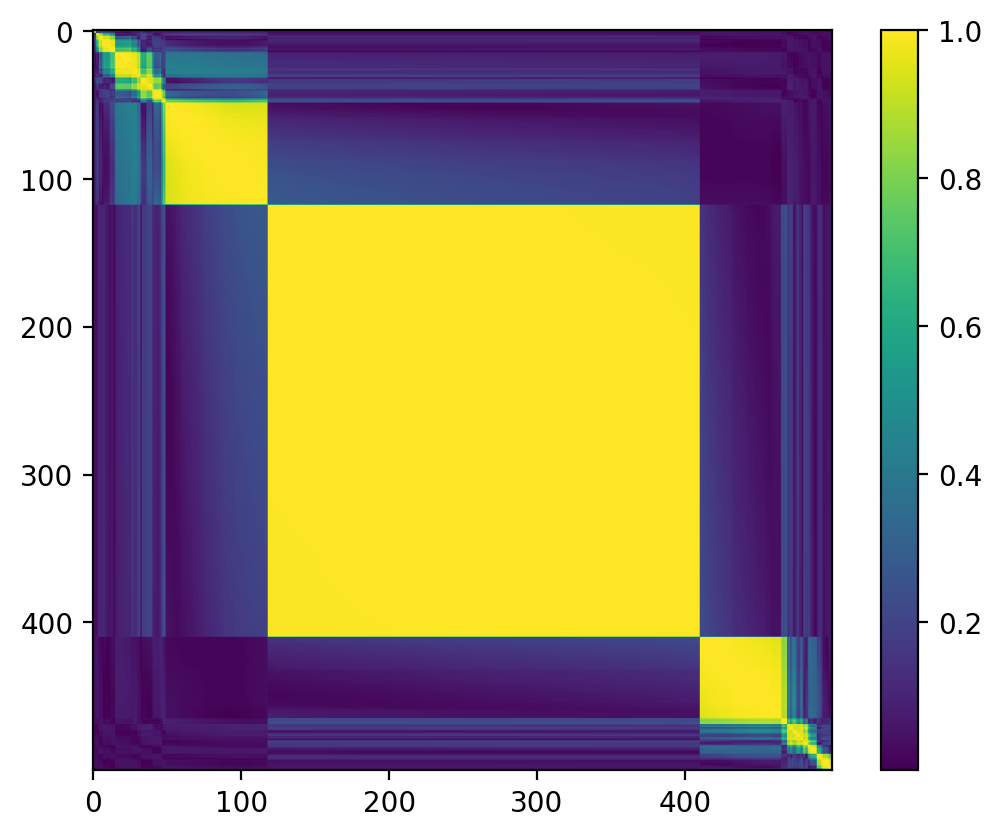

In [38]:
plt.imshow(aPij)
plt.colorbar()

In [42]:
def make_phase_avg_correlation(idx):
    theta_ = df.iloc[idx].theta_s[-100:,:]
    Aij = np.zeros((500,500))
    Pij = np.zeros_like(1j*Aij)
    for t_ in theta_:
        i,j = np.meshgrid(t_,t_)
        Pij += np.exp(1j*(i-j))
    aPij = np.abs(Pij)/100
    return aPij

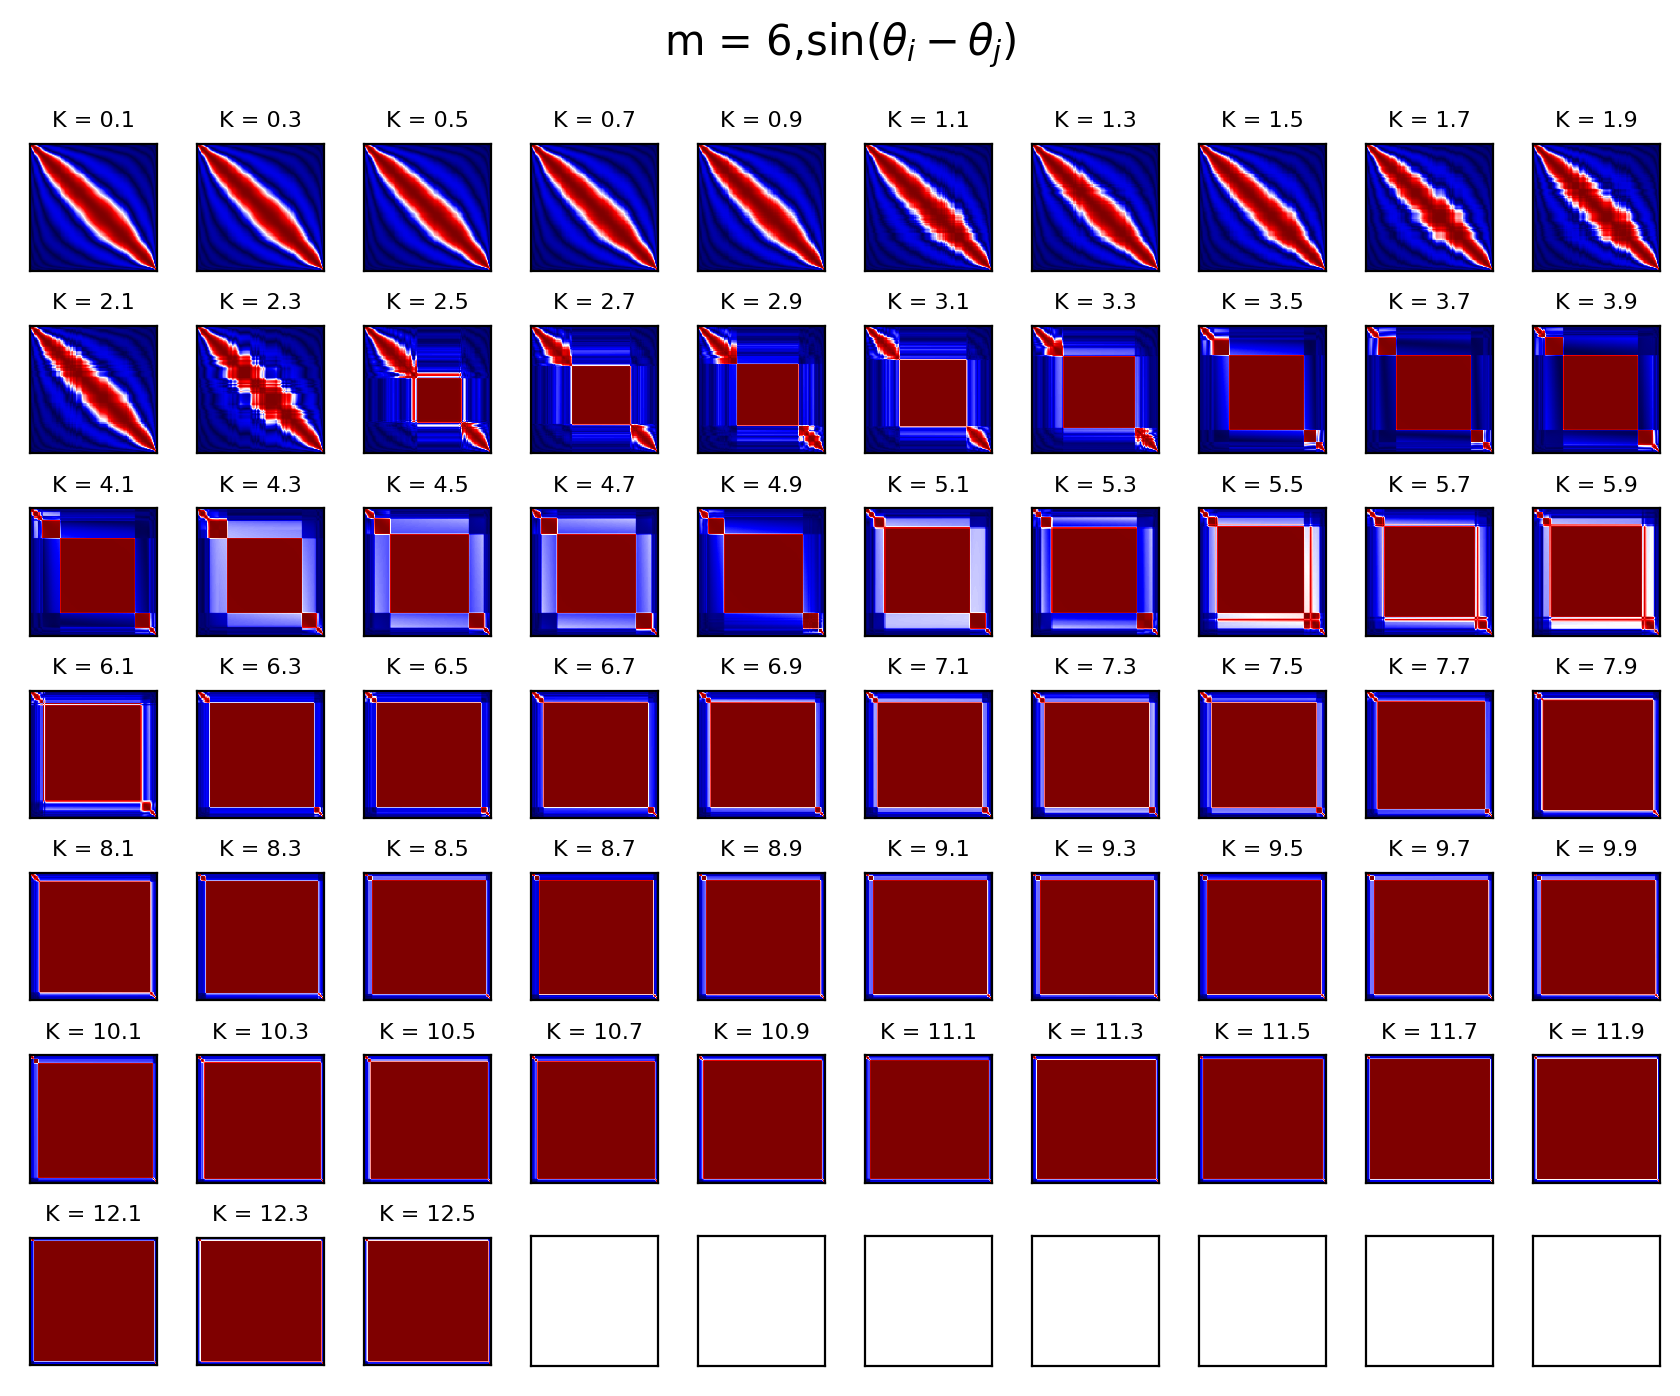

In [43]:
m = 6
df,rdf = df_sets[m],rdf_sets[m]
# mtheta_df = df.theta_s.apply(mean_wtime)
# mtheta_rdf = rdf.theta_s.apply(mean_wtime)
Ks,Ksr = df.index,rdf.index
Create_Folder(DF+f'{dist}')
%config InlineBackend.figure_format = 'retina'
up = math.ceil(len(Ks)/10)
fig, axs = plt.subplots(up,10, sharex='col', sharey='row',figsize=(8.5,10*up/10))

num = 0
for ax_ in axs:
    for ax in ax_:
        # seg_theta = mtheta_df.iloc[num]
        ax.yaxis.set_visible(False)
        ax.xaxis.set_visible(False)
        aPij = make_phase_avg_correlation(num)
        im = ax.imshow(aPij,vmin=0,vmax=1,cmap = 'seismic')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'K = {Ks[num]}',fontsize=8)
        num +=1
        if len(Ks)==num: break


# divider2 = make_axes_locatable(axs.ravel().tolist())
# cax = divider2.append_axes("bottom", size="1%", pad=0.05)
    # cax.axis('off')
# colorbar =fig.colorbar(im, ax=axs.ravel().tolist(),orientation="horizontal")
# colorbar.set_ticks([-1,0,1])
# colorbar.set_label(r'$\sin(\theta_i-\theta_j)$')

fig.suptitle(f'm = {m},'+ r'$\sin(\theta_i- \theta_j)$',fontsize=15,y=0.99)
fig.tight_layout()
plt.savefig(DF+f'{dist}/m = {m}, dK = {dK},Pij.png',dpi=400)


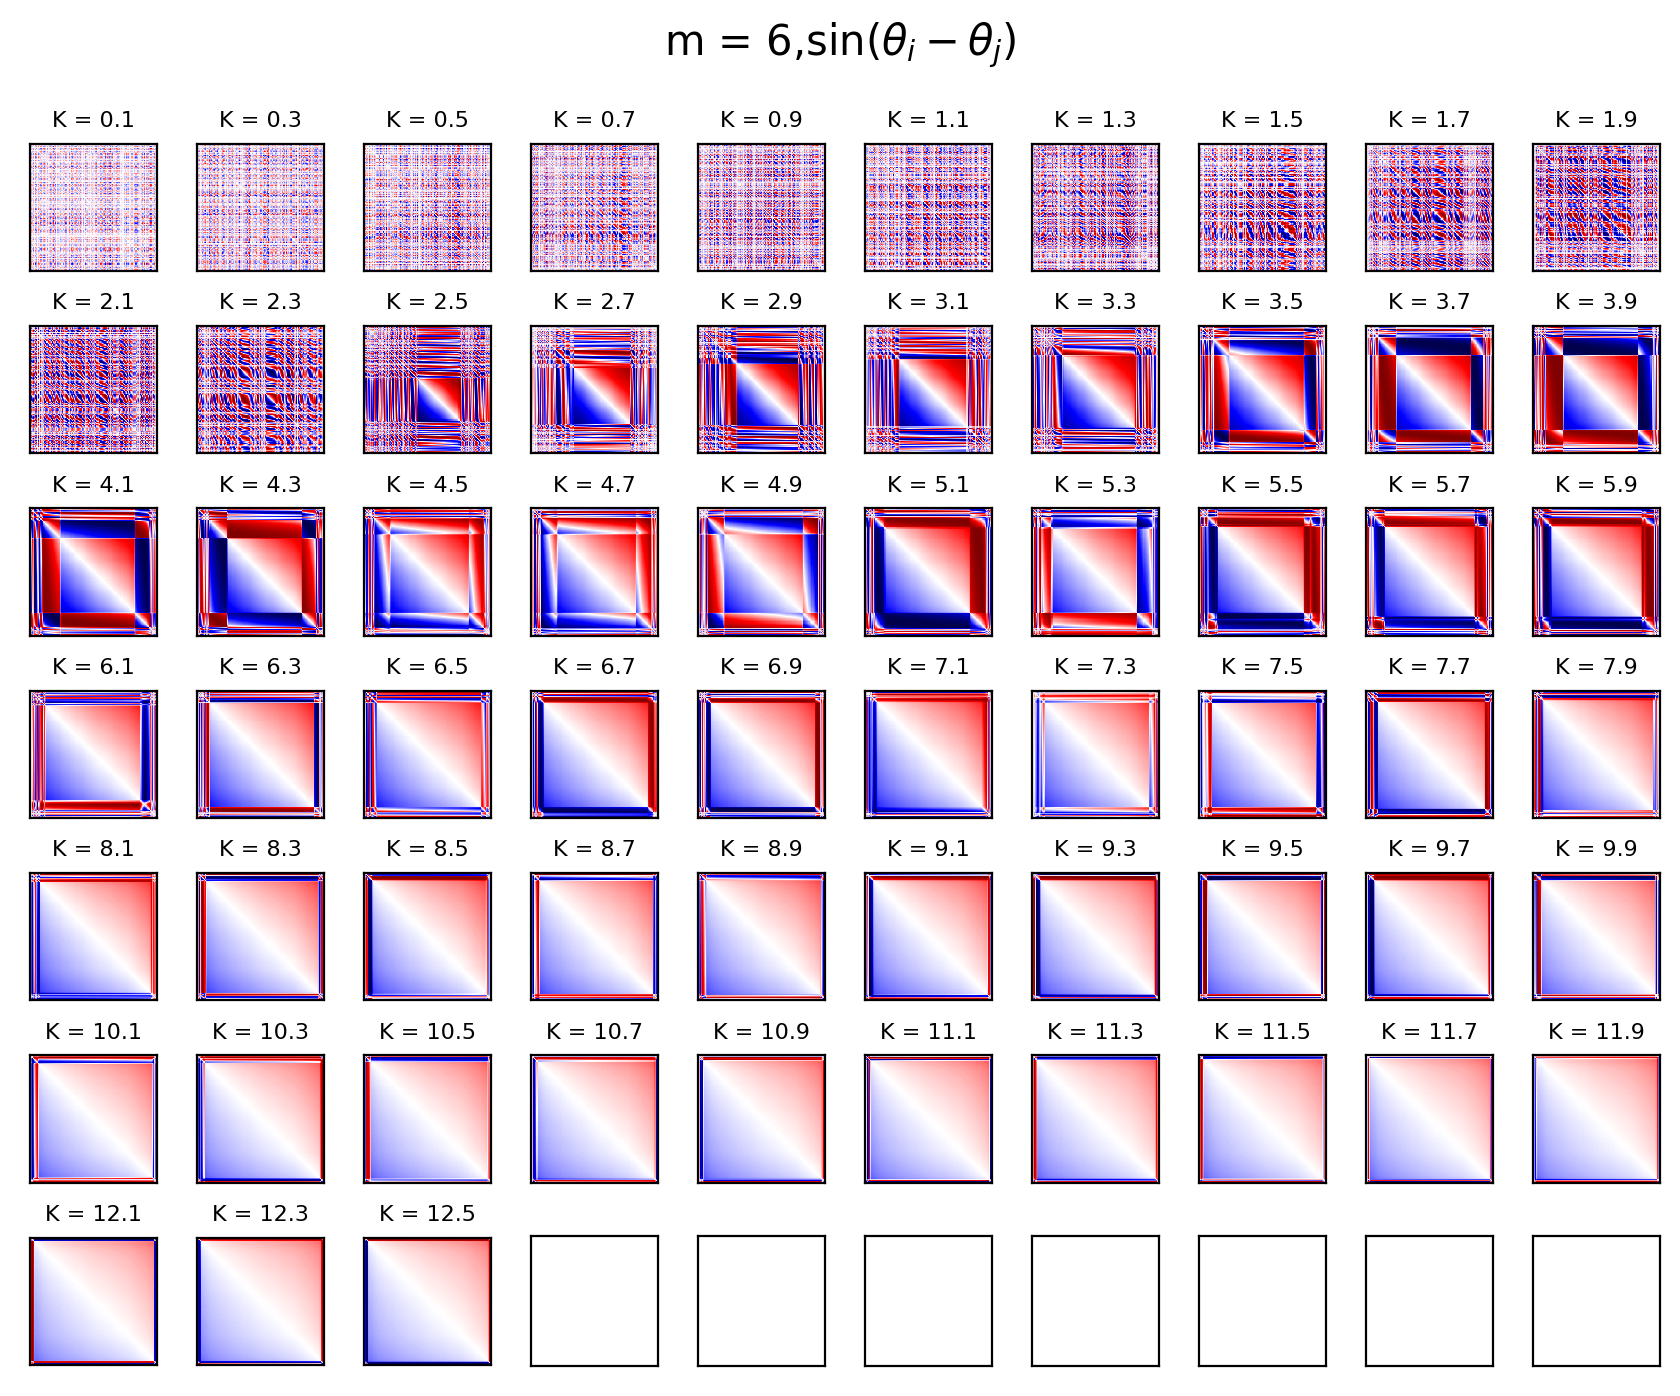

In [41]:
m = 6
df,rdf = df_sets[m],rdf_sets[m]
mtheta_df = df.theta_s.apply(mean_wtime)
mtheta_rdf = rdf.theta_s.apply(mean_wtime)
Ks,Ksr = df.index,rdf.index
Create_Folder(DF+f'{dist}')
%config InlineBackend.figure_format = 'retina'
up = math.ceil(len(Ks)/10)
fig, axs = plt.subplots(up,10, sharex='col', sharey='row',figsize=(8.5,10*up/10))

num = 0
for ax_ in axs:
    for ax in ax_:
        seg_theta = mtheta_df.iloc[num]
        ax.yaxis.set_visible(False)
        ax.xaxis.set_visible(False)
        i,j = np.meshgrid(seg_theta,seg_theta)
        im = ax.imshow(np.sin(i-j),vmin=-1,vmax=1,cmap = 'seismic')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'K = {Ks[num]}',fontsize=8)
        num +=1
        if len(Ks)==num: break


# divider2 = make_axes_locatable(axs.ravel().tolist())
# cax = divider2.append_axes("bottom", size="1%", pad=0.05)
    # cax.axis('off')
# colorbar =fig.colorbar(im, ax=axs.ravel().tolist(),orientation="horizontal")
# colorbar.set_ticks([-1,0,1])
# colorbar.set_label(r'$\sin(\theta_i-\theta_j)$')

fig.suptitle(f'm = {m},'+ r'$\sin(\theta_i- \theta_j)$',fontsize=15,y=0.99)
fig.tight_layout()
plt.savefig(DF+f'{dist}/m = {m}, dK = {dK},sin(thetai- thetaj).png',dpi=400)


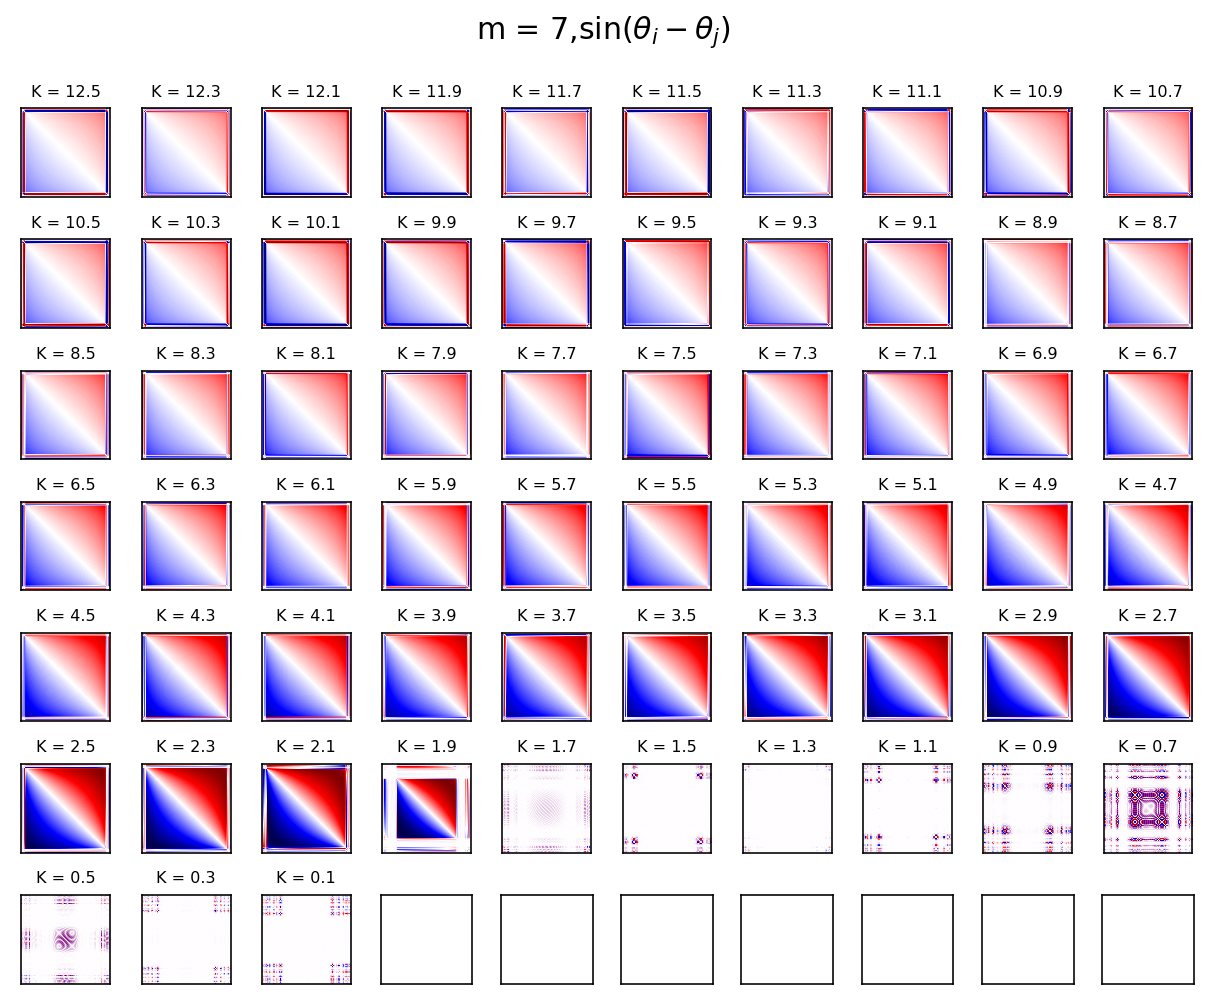

In [21]:
%config InlineBackend.figure_format = 'retina'
up = math.ceil(len(Ks)/10)
fig, axs = plt.subplots(up,10, sharex='col', sharey='row',figsize=(8.5,10*up/10))

num = 0
for ax_ in axs:
    for ax in ax_:
        seg_theta = mtheta_rdf.iloc[num]
        ax.yaxis.set_visible(False)
        ax.xaxis.set_visible(False)
        i,j = np.meshgrid(seg_theta,seg_theta)
        im = ax.imshow(np.sin(i-j),vmin=-1,vmax=1,cmap = 'seismic')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'K = {Ksr[num]}',fontsize=8)
        num +=1
        if len(Ks)==num: break


# divider2 = make_axes_locatable(axs.ravel().tolist())
# cax = divider2.append_axes("bottom", size="1%", pad=0.05)
    # cax.axis('off')
# colorbar =fig.colorbar(im, ax=axs.ravel().tolist(),orientation="horizontal")
# colorbar.set_ticks([-1,0,1])
# colorbar.set_label(r'$\sin(\theta_i-\theta_j)$')

fig.suptitle(f'm = {m},'+ r'$\sin(\theta_i- \theta_j)$',fontsize=15,y=0.99)
fig.tight_layout()
plt.savefig(DF+f'{dist}/m = {m}, dK = {dK},backward sin(thetai- thetaj).png',dpi=400)


In [22]:
def mean_wtime(x):
    temp = x[-200:,:]
    result = np.mean(temp,axis=0)
    return result

def omega_DP(df_sets,m):
    df = df_sets[m]
    Ks = df.index
    O_D,O_P = [],[]
    d_mean,d_min,d_max = [],[],[]
    p_mean,p_min,p_max = [],[],[]
    def mmm(temp,x):
        mean_,min_,max_ = np.mean(temp),np.min(x),np.max(x)
        return np.array([mean_,min_,max_])
    for K in Ks:
        x = df.loc[K].rs
        temp = x[-200:]
        omega_D = mmm(temp,x)*K
        omega_P = (4 / np.pi) * np.sqrt(omega_D / m)
        O_D.append(omega_D)
        O_P.append(omega_P)
    O_D,O_P = map(np.array,[O_D,O_P])
    return O_D,O_P


def omega_DP_(df_sets,m):
    df = df_sets[m]
    Ks = df.index
    O_D,O_P = [],[]
    d_mean,d_min,d_max = [],[],[]
    p_mean,p_min,p_max = [],[],[]
    def mmm(temp,x):
        mean_,min_,max_ = np.mean(temp),np.min(x),np.max(x)
        return np.array([mean_,min_,max_])
    for K in Ks:
        x = df.loc[K].rs
        temp = x[-200:]
        omega_D = np.mean(temp)*K
        omega_P = (4 / np.pi) * np.sqrt(omega_D / m)
        O_D.append(omega_D)
        O_P.append(omega_P)
    O_D,O_P = map(np.array,[O_D,O_P])
    return O_D,O_P

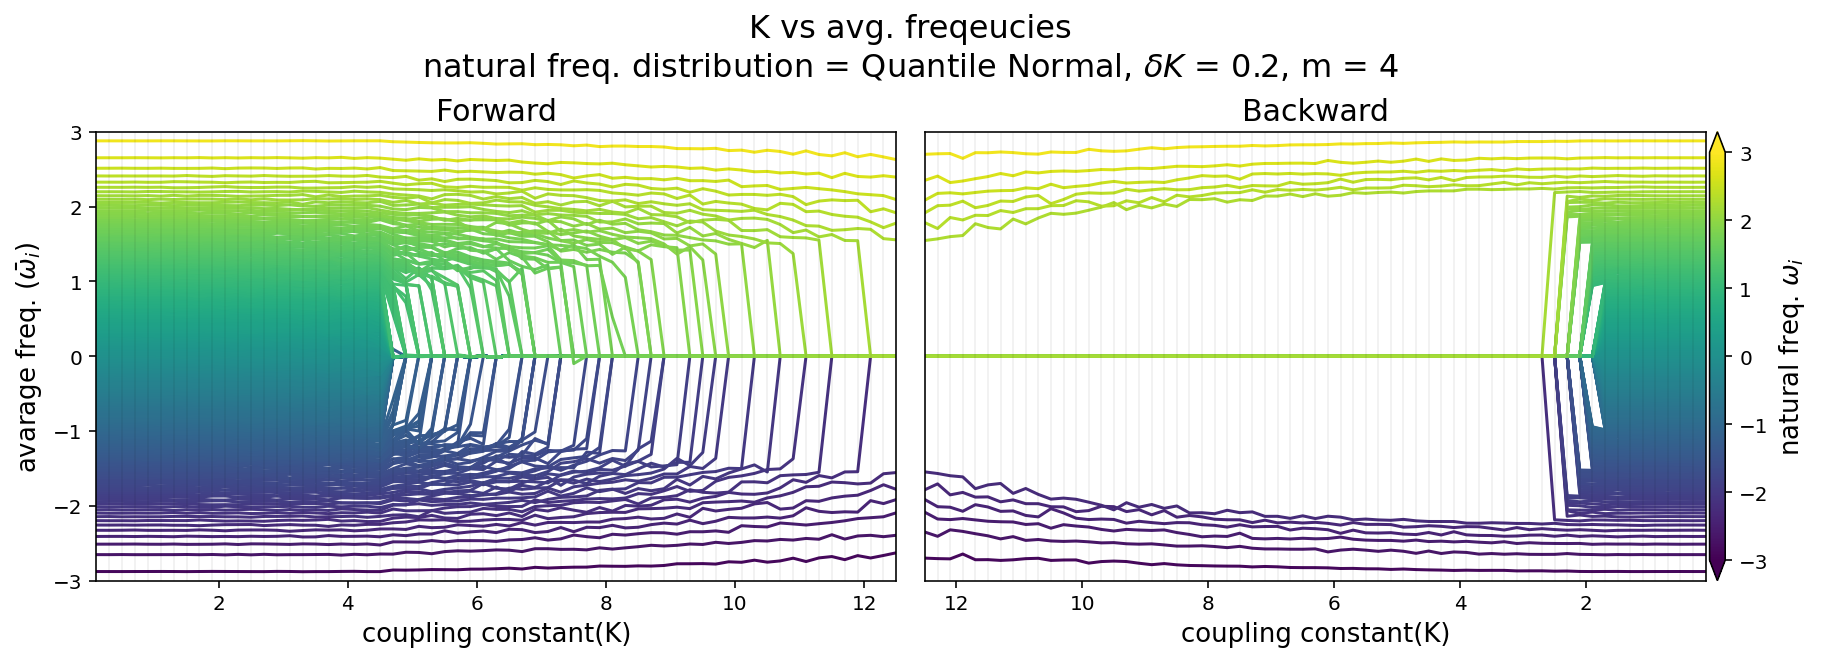

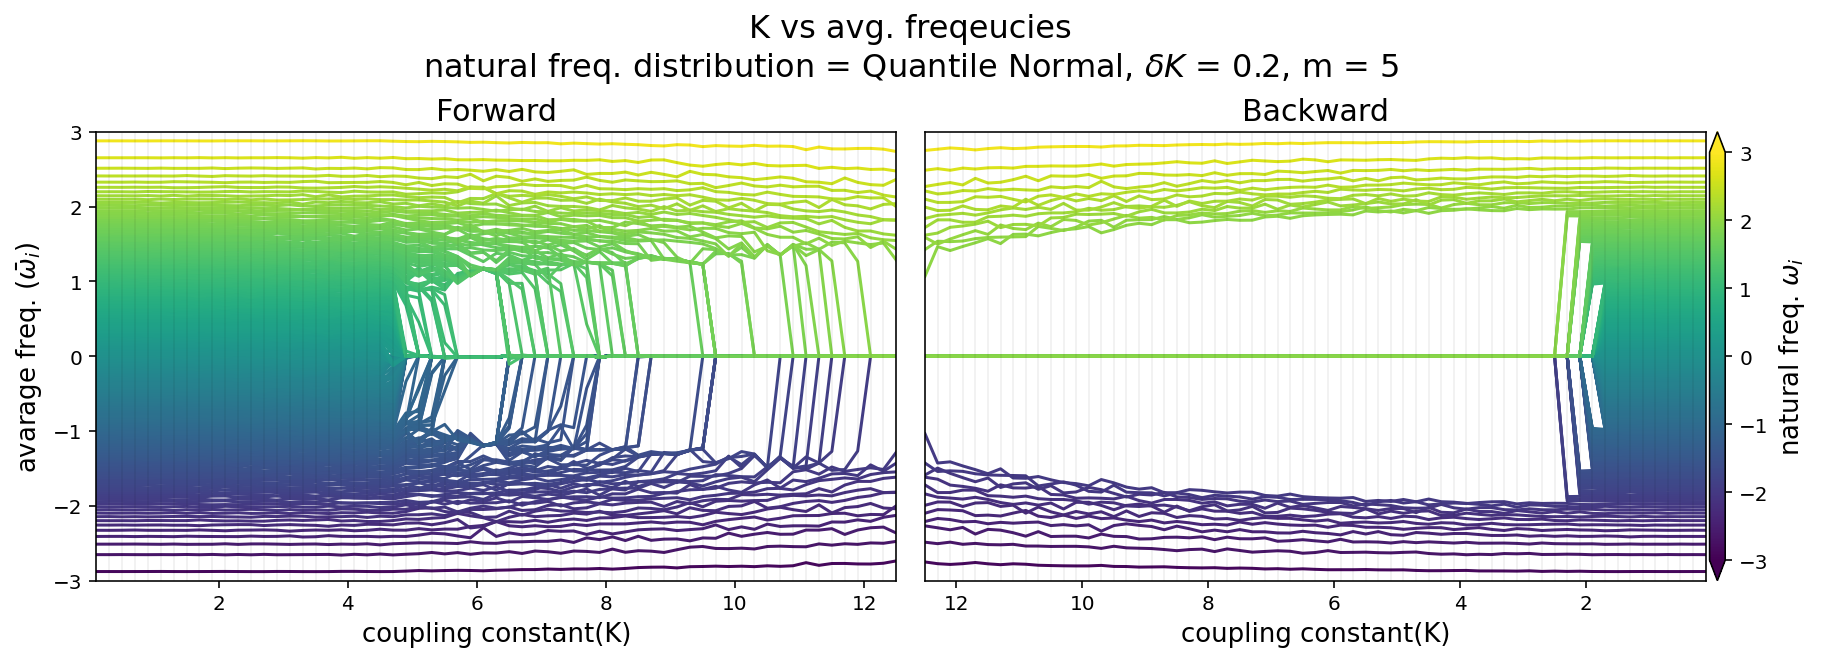

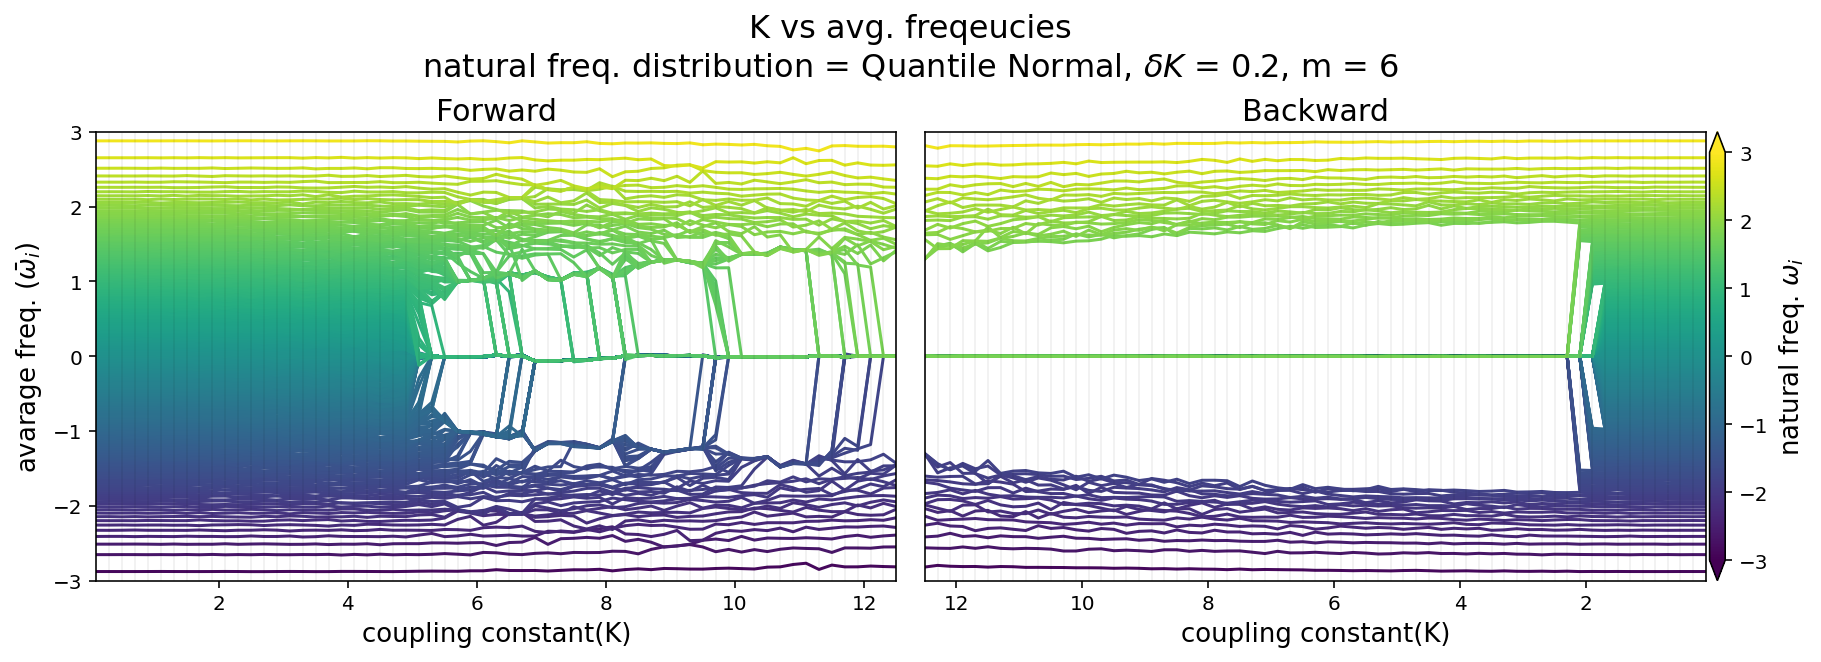

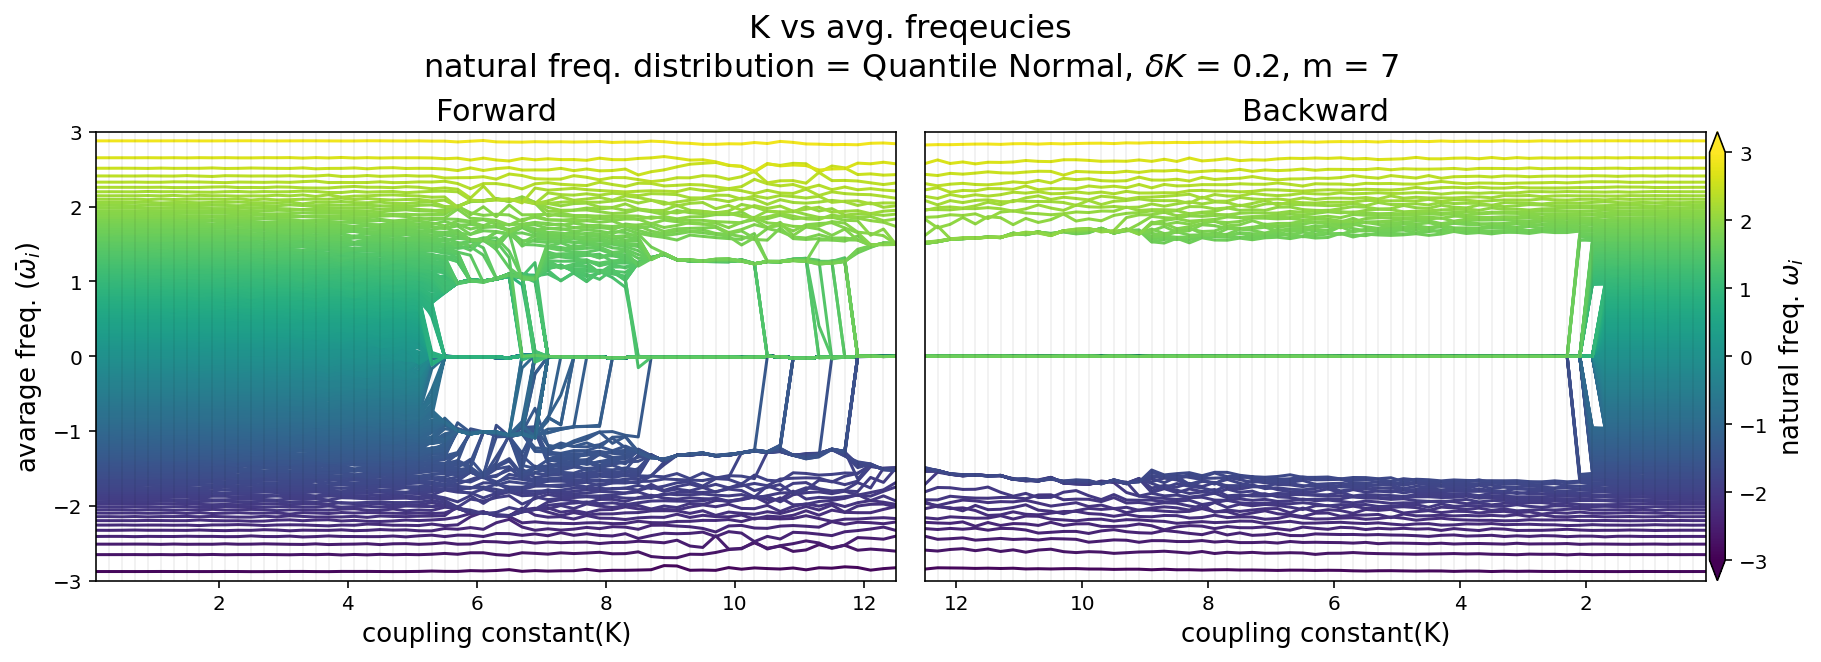

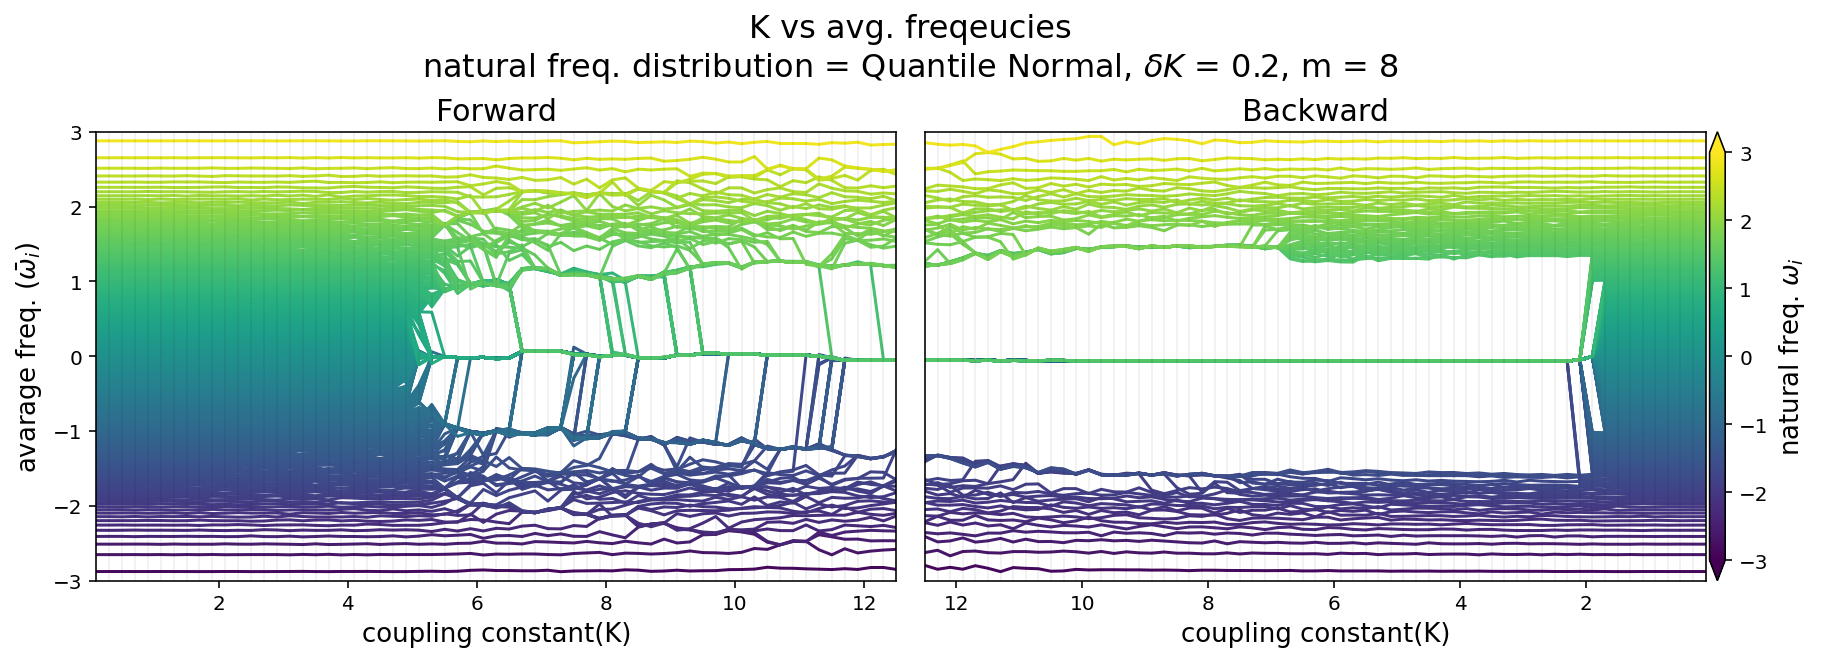

In [23]:
omega = df.iloc[0].Omega
N_omega = (omega-np.min(omega))/(np.max(omega)-np.min(omega))
N_omega = (omega+3)/(6)
Create_Folder(DF+f'{dist}/')
for m in ms:
    df = df_sets[m]
    rdf = rdf_sets[m]
    temp_df = df.dtheta_s.apply(mean_wtime)
    temp_rdf = rdf.dtheta_s.apply(mean_wtime)
    A = np.array(temp_df.to_list())
    B = np.array(temp_rdf.to_list())
    omega = df.iloc[0].Omega
    N_omega = (omega-np.min(omega))/(np.max(omega)-np.min(omega))
    N_omega = (omega+3)/6
    ODf,OPf = omega_DP(df_sets,m)
    ODr,OPr = omega_DP(rdf_sets,m)
    color = plt.cm.viridis(N_omega)
    fig = plt.figure(figsize=(12.8,4.8))
    plt.subplot(121)
    plt.title('Forward',fontsize=15)
    sca = plt.scatter(0*omega,0*omega,s=0,c=omega,vmin=-3,vmax=3)
    for i,mean_pv in enumerate(A.T):
        plt.plot(Ks,mean_pv,color = color[i]);
    # plt.plot(Ks,ODf,color='tab:orange')
    # plt.plot(Ks,-ODf,color='tab:orange')
    # plt.plot(Ks,OPf,color='tab:blue')
    # plt.plot(Ks,-OPf,color='tab:blue')
    plt.vlines(Ks,[-3],[3],color='black',alpha=0.5,lw=0.1)
    plt.xlim(0.1,12.5)
    plt.xlabel('coupling constant(K)',fontsize=13)
    plt.ylabel(r'avarage freq. ($\bar{\omega}_i$)',fontsize=13)
    plt.ylim(-3,3)

    plt.subplot(122)
    plt.title('Backward',fontsize=15)
    ax2 = plt.gca()
    plt.yticks([]) 
    for i,mean_pv in enumerate(B.T):
        ax2.plot(Ksr,mean_pv,color = color[i]);
    plt.vlines(Ksr,[-3],[3],color='black',alpha=0.5,lw=0.1)


    # plt.plot(Ksr,ODr,color='tab:orange')
    # plt.plot(Ksr,-ODr,color='tab:orange')
    # plt.plot(Ksr,OPr,color='tab:blue')
    # plt.plot(Ksr,-OPr,color='tab:blue')
    plt.suptitle('K vs avg. freqeucies\n'+f'natural freq. distribution = {dist}, $\delta K$ = {dK}, m = {m}',fontsize=16,y=0.95)
    ax2.invert_xaxis()
    plt.xlim(12.5,0.1)
    plt.xlabel('coupling constant(K)',fontsize=13)
    plt.ylim(-3,3)

    divider3 = make_axes_locatable(ax2)
    cax = divider3.append_axes("right", size="2%", pad="0.5%")
    cbar =plt.colorbar(sca, cax=cax,extend='both')
    cbar.set_label(r'natural freq. $\omega_i$',fontsize= 13)
    plt.tight_layout()
    plt.savefig(DF+f'{dist}/K vs average freq. m={m},dK={dK},N={N}.png',dpi=400)
    # plt.ylim(1,3)

In [ ]:
Ks

Float64Index([  0.1,  0.15,   0.2,  0.25,   0.3,  0.35,   0.4,  0.45,   0.5,
               0.55,
              ...
              12.05,  12.1, 12.15,  12.2, 12.25,  12.3, 12.35,  12.4, 12.45,
               12.5],
             dtype='float64', length=249)

In [24]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [35]:
m = 7
K = 5.3
direct = 1
sin = []
K_s = []
times = []
temp_df = {1:df_sets[m],-1:rdf_sets[m]}
theta_s = temp_df[direct].theta_s
temp_Ks = theta_s.index
K_idx = np.searchsorted(direct*temp_Ks,direct*K)
for i_ in range(1900,2000,10):
    p_K_ = temp_Ks[K_idx-1]
    # print(p_K_)
    theta = theta_s[p_K_][i_,:]
    i,j = np.meshgrid(theta,theta)
    sin_ = np.sin(i-j)
    sin.append(sin_)
    times.append(i_/10)
    K_s.append(p_K_)
for i_ in range(0,2000,10):
    n_K = temp_Ks[K_idx]
    theta = theta_s[K][i_,:]
    i,j = np.meshgrid(theta,theta)
    sin_ = np.sin(i-j)
    sin.append(sin_)
    times.append(i_/10)
    K_s.append(n_K)

frames = range(len(sin))

# def animation()

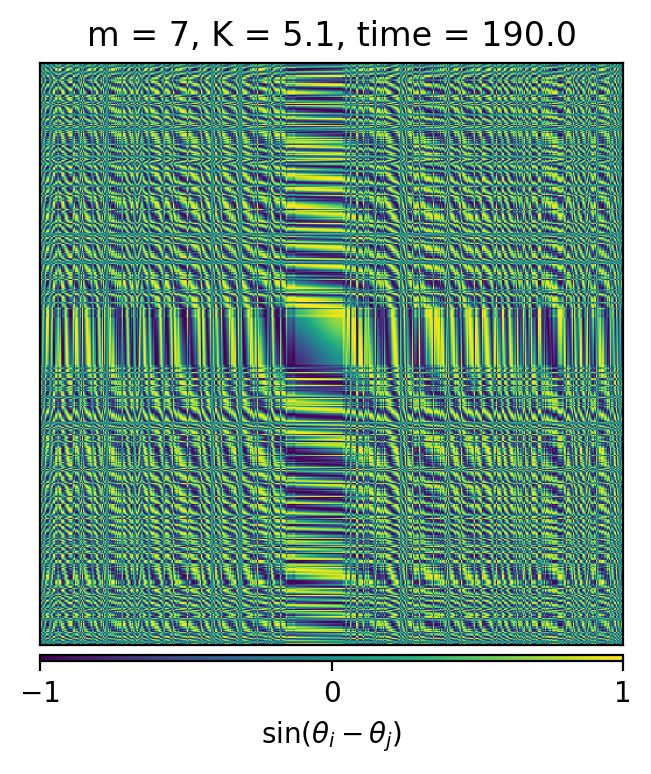

In [36]:
fig, ax = plt.subplots(1,1,dpi=100,facecolor='white')
im = ax.imshow(sin[0])
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(f'm = {m}, K = {K_s[0]}, time = {times[0]}')
divider2 = make_axes_locatable(ax)
cax = divider2.append_axes("bottom", size="1%", pad=0.05)
    # cax.axis('off')
colorbar = fig.colorbar(im, cax=cax, orientation="horizontal")
colorbar.set_ticks([-1,0,1])
colorbar.set_label(r'$\sin(\theta_i-\theta_j)$')
fig.tight_layout()
def Animation(i):
    im.set_data(sin[i])
    ax.set_title(f'm = {m}, K = {K_s[i]}, time = {times[i]}')

In [37]:
%config InlineBackend.figure_format = 'retina'
ani = FuncAnimation(fig,Animation,frames=frames,interval=50)
HTML(ani.to_html5_video())